In [13]:

!pip install -q ultralytics filterpy scipy opencv-python-headless matplotlib

In [14]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [15]:

data_yaml = '/kaggle/working/data.yaml'

with open(data_yaml, 'w') as f:
    f.write("""
nc: 9
names: ['car', 'bus', 'truck', 'bike', 'auto', 'tractor','ambulance', 'fire_engine', 'police_car']
train: /kaggle/input/train2/traindata/images/train
val: /kaggle/input/train2/traindata/images/val
""")

print("data.yaml created successfully!")


data.yaml created successfully!


In [16]:

train_images = '/kaggle/input/train2/traindata/images/train'
train_labels = '/kaggle/input/train2/traindata/labels/train'
val_images = '/kaggle/input/train2/traindata/images/val'
val_labels = '/kaggle/input/train2/traindata/labels/val'

print("Train images:", len(os.listdir(train_images)))
print("Train labels:", len(os.listdir(train_labels)))
print("Validation images:", len(os.listdir(val_images)))
print("Validation labels:", len(os.listdir(val_labels)))


Train images: 3907
Train labels: 3907
Validation images: 531
Validation labels: 531


In [17]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()



In [18]:
import torch, gc
from ultralytics import YOLO

# Clean GPU memory
gc.collect()
torch.cuda.empty_cache()
# Load smaller model
model = YOLO("yolov8x.pt")
model.train(
    data=data_yaml,
    epochs=30,
    batch=8,
    imgsz=640,
    project='runs/train',
    name='smart_traffic_emergency_v2',
    exist_ok=True,
    augment=True,
    mosaic=1.0,       # combines multiple images
    mixup=0.2,        # blend images to simulate variations
    hsv_h=0.015,      # color augmentation
    hsv_s=0.7,
    hsv_v=0.4
)


Ultralytics 8.3.220 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=smart_traffic_emergency_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        525        587      0.826      0.883       0.92      0.756
                   car         33         38      0.648          1       0.98      0.883
                   bus         32         39      0.841      0.923      0.949      0.849
                 truck         30         31       0.93      0.968       0.97      0.887
                  bike         82        109      0.789      0.653      0.777      0.679
                  auto         66         68      0.876      0.926      0.967      0.796
               tractor         61         68      0.856      0.809      0.901      0.589
             ambulance         70         70      0.922      0.986       0.99      0.851
           fire_engine         70         80      0.833      0.762      0.831      0.562
            police_car         82         84      0.736      0.917      0.917      0.709
Speed: 0.2ms preprocess, 61.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/wo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa5fd240fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

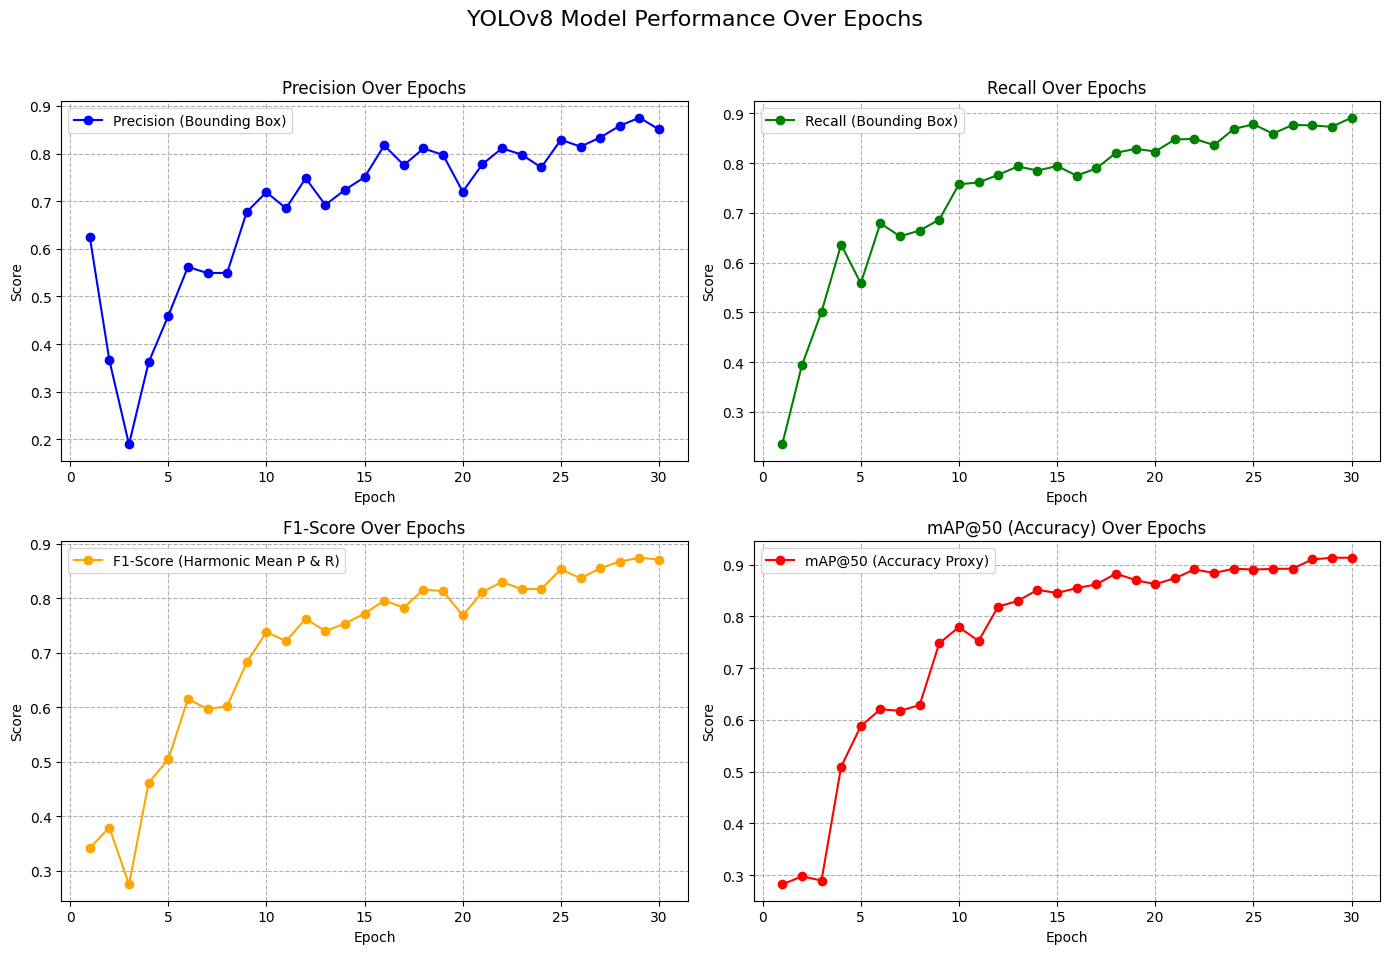

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Define the path where YOLOv8 saves its results
LOG_DIR = 'runs/train/smart_traffic_emergency_v2'
CSV_PATH = os.path.join(LOG_DIR, 'results.csv')

# 2. Check if the results file exists and load it
try:
    df_results = pd.read_csv(CSV_PATH, skipinitialspace=True)
    df_results.columns = df_results.columns.str.strip()

    df_plot = df_results[['epoch', 
                          'metrics/precision(B)', 
                          'metrics/recall(B)', 
                          'metrics/mAP50(B)', 
                          'metrics/mAP50-95(B)']].copy()
    df_plot.columns = ['Epoch', 'Precision', 'Recall', 'mAP@50', 'mAP@50-95']

    # 3. Create a combined figure for all four metrics
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('YOLOv8 Model Performance Over Epochs', fontsize=16)
    epochs = df_plot['Epoch'].values

    # Plot Precision (Top-Left)
    axes[0, 0].plot(epochs, df_plot['Precision'].values, label='Precision (Bounding Box)', color='blue', marker='o')
    axes[0, 0].set_title('Precision Over Epochs')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].grid(True, linestyle='--')
    axes[0, 0].legend()

    # Plot Recall (Top-Right)
    axes[0, 1].plot(epochs, df_plot['Recall'].values, label='Recall (Bounding Box)', color='green', marker='o')
    axes[0, 1].set_title('Recall Over Epochs')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].grid(True, linestyle='--')
    axes[0, 1].legend()

    # Plot F1-Score (Bottom-Left)
    f1_col = next((col for col in df_results.columns if 'f1_score' in col), None)
    if f1_col:
        f1_scores = df_results[f1_col].values
        f1_label = 'F1-Score (from YOLOv8 logs)'
    else:
        P = df_plot['Precision'].values
        R = df_plot['Recall'].values
        f1_scores = 2 * (P * R) / (P + R)
        f1_scores[np.isnan(f1_scores)] = 0  
        f1_label = 'F1-Score (Harmonic Mean P & R)'

    axes[1, 0].plot(epochs, f1_scores, label=f1_label, color='orange', marker='o')
    axes[1, 0].set_title('F1-Score Over Epochs')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].grid(True, linestyle='--')
    axes[1, 0].legend()
    
    # Plot Accuracy (mAP@50) (Bottom-Right)
    axes[1, 1].plot(epochs, df_plot['mAP@50'].values, label='mAP@50 (Accuracy Proxy)', color='red', marker='o')
    axes[1, 1].set_title('mAP@50 (Accuracy) Over Epochs')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].grid(True, linestyle='--')
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

except FileNotFoundError:
    print(f" ❌ Error: Training results CSV not found at {CSV_PATH}. Make sure training was successful and the log path is correct.")
except KeyError as e:
    print(f" ❌ Error: Missing expected column in results CSV. Check column names. Missing: {e}")
except Exception as e:
    print(f" ❌ An unexpected error occurred: {e}")

In [20]:
#detect_results = model.predict(
    #source="/kaggle/input/project1/traindata/images/val",
    #conf=0.25,
    #save=True
#)


In [21]:
!find /kaggle/working -name "best.pt"


/kaggle/working/runs/train/smart_traffic_emergency_v2/weights/best.pt


In [22]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load one validation image
val_images = glob.glob("/kaggle/input/train2/traindata/images/val/Black-2015-Audi-Q3-35-TDI-Premium-Plus-Sunroof-105000-kms-driven-in-Karunagappally-VB201705171774173-ak_LWBP1269574136-1680849465_lg_jpeg.rf.6d60cf9c212c13a665b0fa2c738268fc.jpg")
img_path = val_images[0]   # pick first image
img = cv2.imread(img_path)

# Step 1: Draw YOLO grid
def draw_grid(img, S=7):
    h, w = img.shape[:2]
    out = img.copy()
    for i in range(1, S):
        cv2.line(out, (0, i*h//S), (w, i*h//S), (0,255,0), 1)
        cv2.line(out, (i*w//S, 0), (i*w//S, h), (0,255,0), 1)
    return out
grid_img = draw_grid(img)

# Step 2: Proposals (low confidence boxes)
model = YOLO('yolov8x.pt')

results_prop = model.predict(img_path, conf=0.01, iou=0.2, max_det=2000)
overlay = img.copy()
for box in results_prop[0].boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)
    color = tuple(np.random.randint(0,255,3).tolist())
    cv2.rectangle(overlay, (x1, y1), (x2, y2), color, 1)
proposals_img = cv2.addWeighted(overlay, 0.4, img, 0.6, 0)

# Step 3: Final detections
results_final = model.predict(img_path, conf=0.25, iou=0.45)
final_img = results_final[0].plot()

# Combine horizontally and show inline
combined = np.hstack((grid_img, proposals_img, final_img))

plt.figure(figsize=(18,6))
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



image 1/1 /kaggle/input/train2/traindata/images/val/Black-2015-Audi-Q3-35-TDI-Premium-Plus-Sunroof-105000-kms-driven-in-Karunagappally-VB201705171774173-ak_LWBP1269574136-1680849465_lg_jpeg.rf.6d60cf9c212c13a665b0fa2c738268fc.jpg: 480x640 1 person, 1 car, 2 potted plants, 73.2ms
Speed: 2.7ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/train2/traindata/images/val/Black-2015-Audi-Q3-35-TDI-Premium-Plus-Sunroof-105000-kms-driven-in-Karunagappally-VB201705171774173-ak_LWBP1269574136-1680849465_lg_jpeg.rf.6d60cf9c212c13a665b0fa2c738268fc.jpg: 480x640 1 car, 1 potted plant, 50.2ms
Speed: 1.6ms preprocess, 50.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 /kaggle/input/imagessort/imagestest(s)/trainimages/8d205d8d-5aaa-47bd-9b58-04cdfa822a10.png: 448x640 14 cars, 41.6ms
Speed: 2.4ms preprocess, 41.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


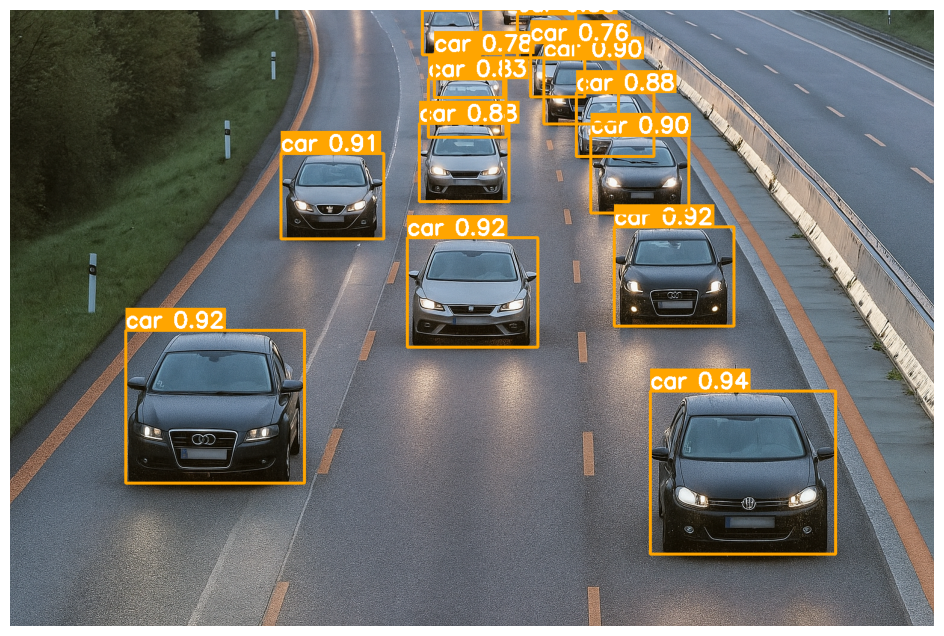

Detection complete. Results saved to: annotated_image_style.png


In [23]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# --- Configuration ---
MODEL_PATH = 'yolov8x.pt' 
IMAGE_PATH = "/kaggle/input/imagessort/imagestest(s)/trainimages/8d205d8d-5aaa-47bd-9b58-04cdfa822a10.png"  # Replace with your image path
CONFIDENCE_THRESHOLD = 0.5  # Show detections >=50%

# Define colors (BGR format for OpenCV)
COLOR_NORMAL = (0, 165, 255)  # Orange
COLOR_EMERGENCY = (0, 0, 255)  # Red

# Define class IDs (adjust according to your dataset)
# Normal vehicles
NORMAL_CLASSES = [1, 2, 3, 4, 5, 6]   # bicycle, car, motorcycle, auto, truck, bus  

# Emergency vehicles
EMERGENCY_CLASSES = [7, 8, 9]   # ambulance, police, fire_engine


# --- Load YOLOv8 Model ---
model = YOLO(MODEL_PATH)

# --- Run Inference ---
results = model(IMAGE_PATH, conf=CONFIDENCE_THRESHOLD)

# --- Read image for annotation ---
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise FileNotFoundError(f"Image not found at {IMAGE_PATH}")

# --- Draw bounding boxes ---
for det in results[0].boxes:  # iterate over detected boxes
    x1, y1, x2, y2 = map(int, det.xyxy[0])  # bounding box coordinates
    conf = float(det.conf[0])                # confidence
    cls_id = int(det.cls[0])                 # class ID
    label = results[0].names[cls_id]        # class name

    # Choose color based on class type
    if cls_id in NORMAL_CLASSES:
        color = COLOR_NORMAL
    elif cls_id in EMERGENCY_CLASSES:
        color = COLOR_EMERGENCY
    else:
        color = (255, 255, 255)  # fallback white

    # Draw rectangle (thicker)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)

    # Draw label with bigger font and bold
    font_scale = 1.2
    font_thickness = 3
    text = f"{label} {conf:.2f}"
    (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x1, y1 - text_height - 10), (x1 + text_width, y1), color, -1)  # filled rectangle behind text
    cv2.putText(img, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255,255,255), font_thickness)

# --- Save and Display Result ---
output_image_path = 'annotated_image_style.png'
cv2.imwrite(output_image_path, img)

# Display in notebook
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f"Detection complete. Results saved to: {output_image_path}")


Processing video:   0%|          | 0/507 [00:00<?, ?it/s]

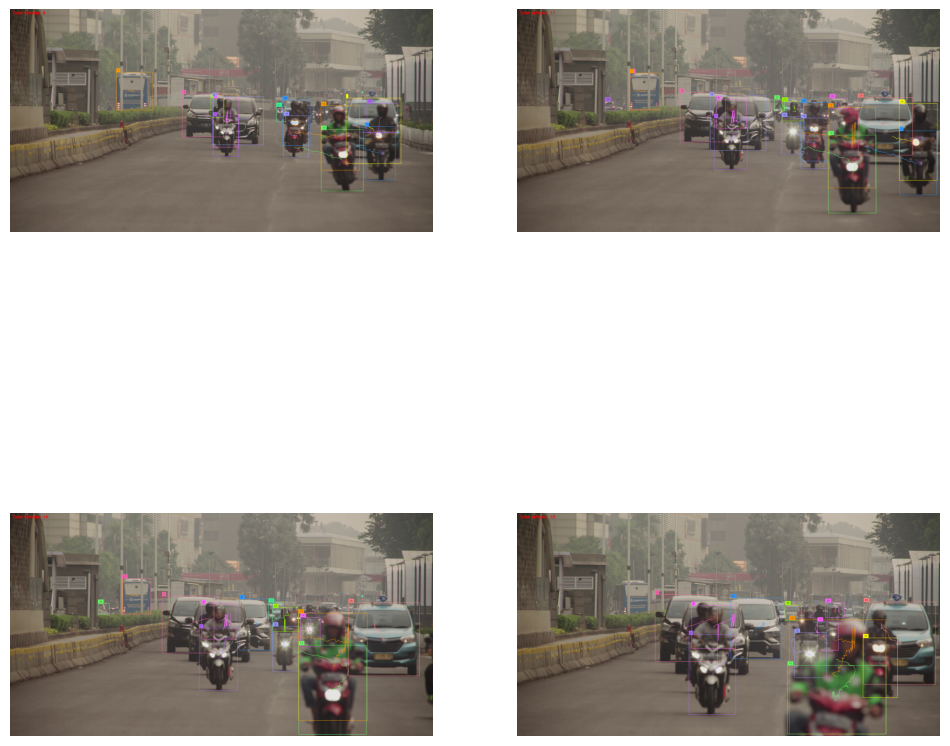

✅ Final Vehicle Count: 53


In [28]:
!pip install -q inference-gpu
!pip install -q supervision==0.27.0rc1
!pip install -q trackers

from inference import get_model
from trackers import SORTTracker
import supervision as sv
import cv2

# --- Model and Tracker Setup ---
model = get_model("yolov8m-640")
tracker = SORTTracker()

# --- Visualization Setup ---
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

box_annotator = sv.BoxAnnotator(color=color, color_lookup=sv.ColorLookup.TRACK)
trace_annotator = sv.TraceAnnotator(
    color=color, color_lookup=sv.ColorLookup.TRACK, thickness=2, trace_length=100
)
label_annotator = sv.LabelAnnotator(
    color=color, color_lookup=sv.ColorLookup.TRACK,
    text_color=sv.Color.BLACK, text_scale=0.8
)

# --- Thresholds ---
CONFIDENCE_THRESHOLD = 0.3
NMS_THRESHOLD = 0.3

# --- Paths ---
SOURCE_VIDEO_PATH = "/kaggle/input/videos/videos test (s)/vecteezy_jakarta-traffic-in-the-morning_29776798.mp4"
TARGET_VIDEO_PATH = "/content/bikes-1280x720-1-result.mp4"

# --- Vehicle Counting Setup ---
vehicle_classes = {"car","truck","bus","tractor","motorbike","auto","ambulance","police","fire_engine"}
counted_ids = set()  # To ensure we count each vehicle only once
vehicle_count = 0

frame_samples = []

def callback(frame, i):
    global vehicle_count
    result = model.infer(frame, confidence=CONFIDENCE_THRESHOLD)[0]
    detections = sv.Detections.from_inference(result).with_nms(threshold=NMS_THRESHOLD)
    detections = tracker.update(detections)

    annotated_image = frame.copy()

    # Loop through detections
    for det, class_name, track_id in zip(detections.xyxy, detections.data["class_name"], detections.tracker_id):
        if class_name in vehicle_classes:
            if track_id not in counted_ids:
                counted_ids.add(track_id)
                vehicle_count += 1

    # --- Draw annotations ---
    annotated_image = box_annotator.annotate(annotated_image, detections)
    annotated_image = trace_annotator.annotate(annotated_image, detections)
    annotated_image = label_annotator.annotate(annotated_image, detections, detections.tracker_id)

    # --- Display vehicle count on video ---
    cv2.putText(
        annotated_image,
        f"Total Vehicles: {vehicle_count}",
        (30, 50),
        cv2.FONT_HERSHEY_SIMPLEX,
        1.2,
        (0, 0, 255),
        3,
        cv2.LINE_AA
    )

    if i % 30 == 0 and i != 0:
        frame_samples.append(annotated_image)

    return annotated_image

# Reset and run video processing
tracker.reset()
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback,
    show_progress=True,
)

# Display sample frames
sv.plot_images_grid(images=frame_samples[:4], grid_size=(2, 2))

print(f"✅ Final Vehicle Count: {vehicle_count}")



0: 448x640 25 cars, 3 trucks, 66.8ms
Speed: 2.6ms preprocess, 66.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


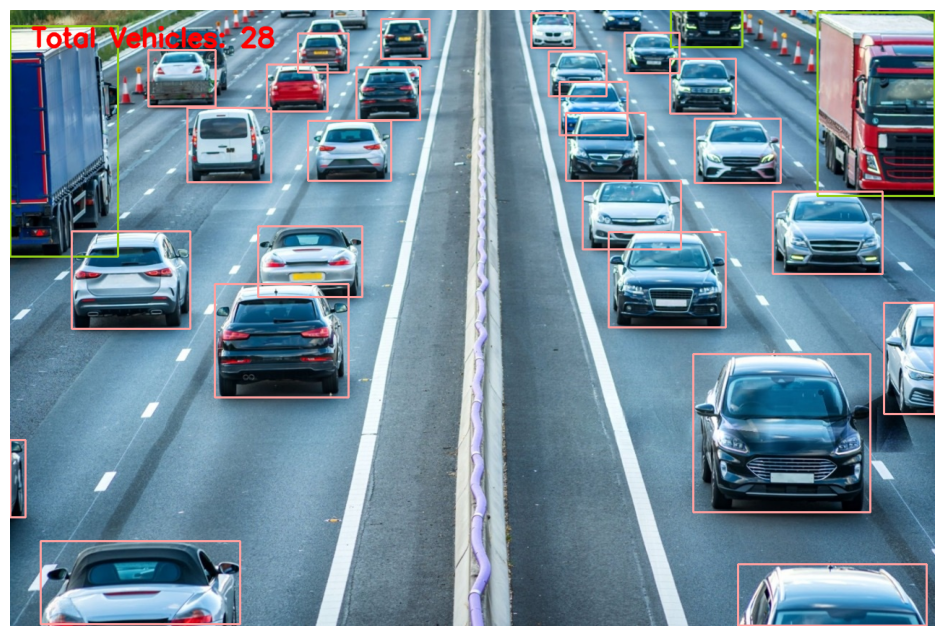

✅ Total Vehicles Detected: 28


In [29]:

##vechicle counts image 

from ultralytics import YOLO
import supervision as sv
import cv2

# --- Model Setup ---
model = YOLO("yolov8x.pt")

# --- Vehicle Classes to Count ---
vehicle_classes = {"car", "truck", "bus", "tractor", "motorbike", "auto", "ambulance", "police", "fire_engine"}

# --- Confidence Threshold ---
CONFIDENCE_THRESHOLD = 0.3

# --- Read Image ---
IMAGE_PATH = "/kaggle/input/imagessort/imagestest(s)/trainimages/wmremove-transformed (1).jpeg"
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise FileNotFoundError(f"Image not found at: {IMAGE_PATH}")

# --- Run Inference ---
results = model.predict(img, conf=CONFIDENCE_THRESHOLD)
result = results[0]  # YOLOv8 returns a list; take the first result

# --- Convert to Supervision Detections ---
detections = sv.Detections.from_ultralytics(result).with_nms(threshold=0.3)

# --- Count Vehicles ---
vehicle_detections = [cls for cls in detections.data["class_name"] if cls in vehicle_classes]
vehicle_count = len(vehicle_detections)

# --- Annotate Image ---
box_annotator = sv.BoxAnnotator()
annotated_img = box_annotator.annotate(scene=img.copy(), detections=detections)

# --- Display Vehicle Count ---
cv2.putText(
    annotated_img,
    f"Total Vehicles: {vehicle_count}",
    (30, 50),
    cv2.FONT_HERSHEY_SIMPLEX,
    1.2,
    (0, 0, 255),
    3,
    cv2.LINE_AA
)

# --- Show Annotated Image ---
sv.plot_image(annotated_img, size=(12, 8))

print(f"✅ Total Vehicles Detected: {vehicle_count}")


Detected: ambulance (0.90) | OCR: AMBULANCE, bengalurukMcC, Mhumte
Detected: truck (0.87) | OCR: mb
Detected: car (0.86) | OCR: 
Detected: car (0.80) | OCR: 
Detected: truck (0.79) | OCR: nce
Detected: truck (0.71) | OCR: Ttc
Detected: truck (0.70) | OCR: 
Detected: car (0.68) | OCR: 
Detected: car (0.65) | OCR: 
Detected: car (0.54) | OCR: 
Detected: truck (0.52) | OCR: 
Detected: car (0.50) | OCR: 
Detected: car (0.44) | OCR: 
Detected: car (0.39) | OCR: 
Detected: car (0.39) | OCR: 
Detected: person (0.37) | OCR: 
Detected: car (0.37) | OCR: car
Detected: truck (0.37) | OCR: 
Detected: truck (0.36) | OCR: Yoin
Detected: truck (0.32) | OCR: 
Detected: bus (0.31) | OCR: 
Detected: car (0.30) | OCR: 
Detected: person (0.29) | OCR: 
Detected: car (0.28) | OCR: 


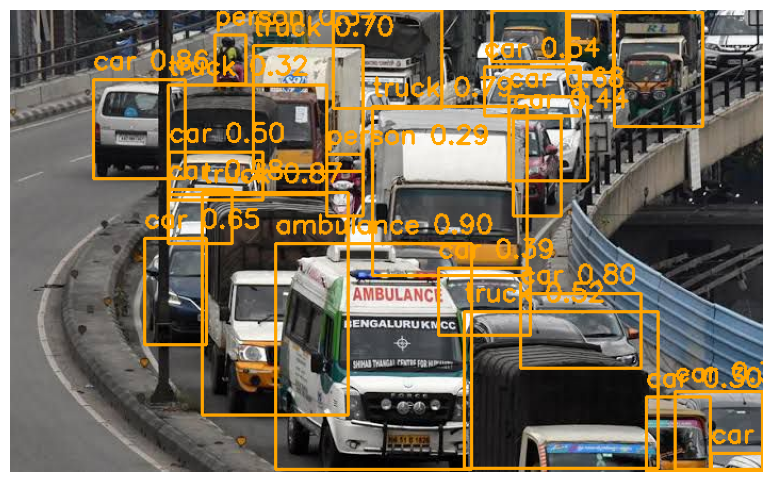

In [43]:
import cv2
import easyocr
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- Load YOLO model ---
MODEL_PATH = "yolov8m.pt"  # or your custom model
model = YOLO(MODEL_PATH)

# --- Load image ---
IMAGE_PATH = "/kaggle/input/emergecny4567/emergency detec/emergency/emergency/emergency images/IMG amb.jpg" 

image = cv2.imread(IMAGE_PATH)

# --- Run detection (disable verbose print) ---
results = model.predict(image, verbose=False)[0]

# --- Initialize OCR ---
reader = easyocr.Reader(['en'])

# --- Define keywords ---
AMBULANCE_WORDS = ["ambulance", "108", "emri", "emergency"]
FIRE_WORDS = ["fire", "rescue"]
POLICE_WORDS = ["police", "control", "dial 100"]

# --- Process detections ---
for box, cls_id, conf in zip(results.boxes.xyxy, results.boxes.cls, results.boxes.conf):
    x1, y1, x2, y2 = map(int, box)
    cls_name = model.names[int(cls_id)]
    confidence = float(conf)

    # Crop detection
    crop = image[y1:y2, x1:x2]

    # OCR on cropped region
    ocr_results = reader.readtext(crop, detail=0)
    detected_text = " ".join(ocr_results).lower()

    # --- Correction logic ---
    if cls_name in ["truck", "car", "van"]:
        if any(w in detected_text for w in AMBULANCE_WORDS):
            cls_name = "ambulance"
        elif any(w in detected_text for w in FIRE_WORDS):
            cls_name = "fire_engine"
        elif any(w in detected_text for w in POLICE_WORDS):
            cls_name = "police_car"

    # --- Draw updated label ---
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 165, 255), 2)
    cv2.putText(image, f"{cls_name} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 165, 255), 2)

    # --- Print only corrected label ---
    print(f"Detected: {cls_name} ({confidence:.2f}) | OCR: {', '.join(ocr_results)}")

# --- Display corrected output ---
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Detected: police_car (0.90) | OCR: In Partnership with, the Community, CItY, Of, IRVINE, POLICE
Detected: car (0.68) | OCR: 
Detected: car (0.61) | OCR: 
Detected: car (0.55) | OCR: 
Detected: car (0.52) | OCR: 
Detected: car (0.48) | OCR: 
Detected: car (0.39) | OCR: 


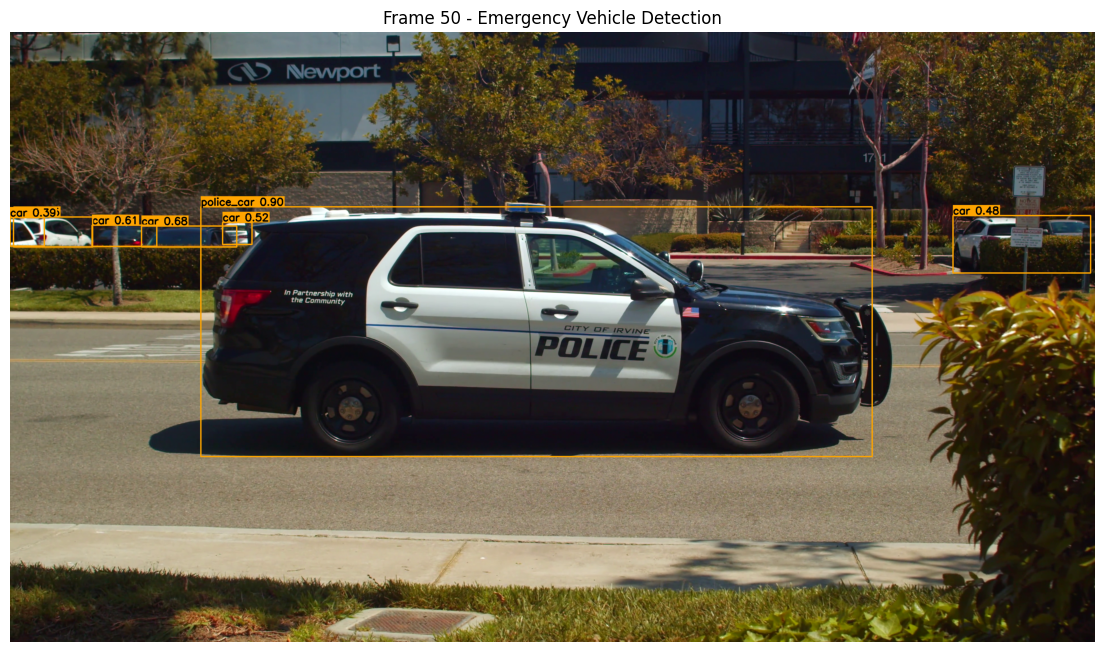

In [44]:
# --- Install dependencies if needed ---
# !pip install ultralytics easyocr opencv-python matplotlib

import cv2
import easyocr
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# --- Load YOLO model ---
MODEL_PATH = "yolov8m.pt"  # or your custom model
model = YOLO(MODEL_PATH)

# --- Load video ---
VIDEO_PATH = "/kaggle/input/emergecny4567/emergency detec/emergency/emergency/emergency vid/7714426-uhd_3840_2160_30fps.mp4"  # change this to your video path
cap = cv2.VideoCapture(VIDEO_PATH)

# --- Read one frame ---
frame_number = 50
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
cap.release()

if not ret:
    raise ValueError("❌ Could not read frame from video. Check path or frame number.")

# --- Initialize OCR ---
reader = easyocr.Reader(['en'])

# --- Define keywords ---
AMBULANCE_WORDS = ["ambulance", "108", "emri", "emergency", "life support", "paramedic", "emergency medical", "health", "red cross"]
FIRE_WORDS = ["fire", "rescue", "engine", "brigade", "hydrant"]
POLICE_WORDS = ["police", "control", "dial 100", "law enforcement", "patrol", "city of", "department", "sheriff"]

# --- Run YOLO detection ---
results = model.predict(frame, verbose=False)[0]

# --- Process detections ---
for box, cls_id, conf in zip(results.boxes.xyxy, results.boxes.cls, results.boxes.conf):
    x1, y1, x2, y2 = map(int, box)
    cls_name = model.names[int(cls_id)]
    confidence = float(conf)

    # Crop detection
    crop = frame[y1:y2, x1:x2]
    ocr_results = reader.readtext(crop, detail=0)
    detected_text = " ".join(ocr_results).lower()

    # --- Correction logic ---
    if cls_name in ["truck", "car", "van"]:
        if any(w in detected_text for w in AMBULANCE_WORDS):
            cls_name = "ambulance"
        elif any(w in detected_text for w in FIRE_WORDS):
            cls_name = "fire_engine"
        elif any(w in detected_text for w in POLICE_WORDS):
            cls_name = "police_car"

    # --- Draw orange bounding box ---
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 165, 255), 3)

    # --- Draw text with background for better visibility ---
    label = f"{cls_name} {confidence:.2f}"
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
    cv2.rectangle(frame, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 165, 255), -1)
    cv2.putText(frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 3)

    print(f"Detected: {cls_name} ({confidence:.2f}) | OCR: {', '.join(ocr_results)}")

# --- Show output ---
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Frame {frame_number} - Emergency Vehicle Detection")
plt.show()
